In [0]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


### Dimesionality Reduction

Q. What is the curse of dimensionality?

The curse of dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces (often with hundreds or thousands of dimensions) that do not occur in low-dimensional settings such as the three-dimensional physical space of everyday experience

Q. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

It still can, but the performance would be bad. Since PCA is good at linear problem.

Q. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

Verify how much information is lost (Usually measure with the variance) during the reduction

Q. Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [0]:
def sort_by_target(mnist):
   reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
   reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
   mnist.data[:60000] = mnist.data[reorder_train]
   mnist.target[:60000] = mnist.target[reorder_train]
   mnist.data[60000:] = mnist.data[reorder_test + 60000]
   mnist.target[60000:] = mnist.target[reorder_test + 60000]

try:
   from sklearn.datasets import fetch_openml
   mnist = fetch_openml('mnist_784', version=1, cache=True)
   mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
   sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
   from sklearn.datasets import fetch_mldata
   mnist = fetch_mldata('MNIST original')

In [0]:
X, y = mnist["data"], mnist["target"]
train_index = np.random.permutation(60000)
X_train, y_train = X[train_index], y[train_index]

index=[i for i in range(70000)]
test_index = list(set(index) - set(train_index))

X_test, y_test = X[test_index], y[test_index]

In [4]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics


start = time.time()

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
forest_clf.fit(X_train,y_train)


end = time.time()
print(end -  start)

7.483333587646484


It takes 3.69 seconds.

In [5]:
prediction = forest_clf.predict(X_test)

# testing score
score_test = metrics.f1_score(y_test, prediction, average=None)
print("Score for every label:",score_test)

score_test = metrics.f1_score(y_test, prediction, average='weighted')
print("weighted score:",score_test)


Score for every label: [0.96990973 0.98551996 0.93863854 0.93175074 0.94934144 0.93280632
 0.96292428 0.94896958 0.92283629 0.93559661]
weighted score: 0.9484018161162159


In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

X_train_r = X_reduced[train_index]
X_test_r = X_reduced[test_index]



In [7]:

start = time.time()

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
forest_clf.fit(X_train_r,y_train)


end = time.time()
print(end -  start)

prediction_r = forest_clf.predict(X_test_r)

# testing score
score_test = metrics.f1_score(y_test, prediction_r, average=None)
print("Score for every label:",score_test)

score_test = metrics.f1_score(y_test, prediction_r, average='weighted')
print("weighted score:",score_test)

17.246784448623657
Score for every label: [0.93221178 0.97548161 0.88045541 0.85755396 0.87617168 0.84305949
 0.9251844  0.9039323  0.82371968 0.85831622]
weighted score: 0.8891821405656054


## The result shows that PCA slows down the model. And the f1 score is lower

Q. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_tsne = TSNE(n_components=2, random_state=42,n_iter=250).fit_transform(X)

In [0]:
# check PCA
X_pca = PCA(n_components=2).fit_transform(X)

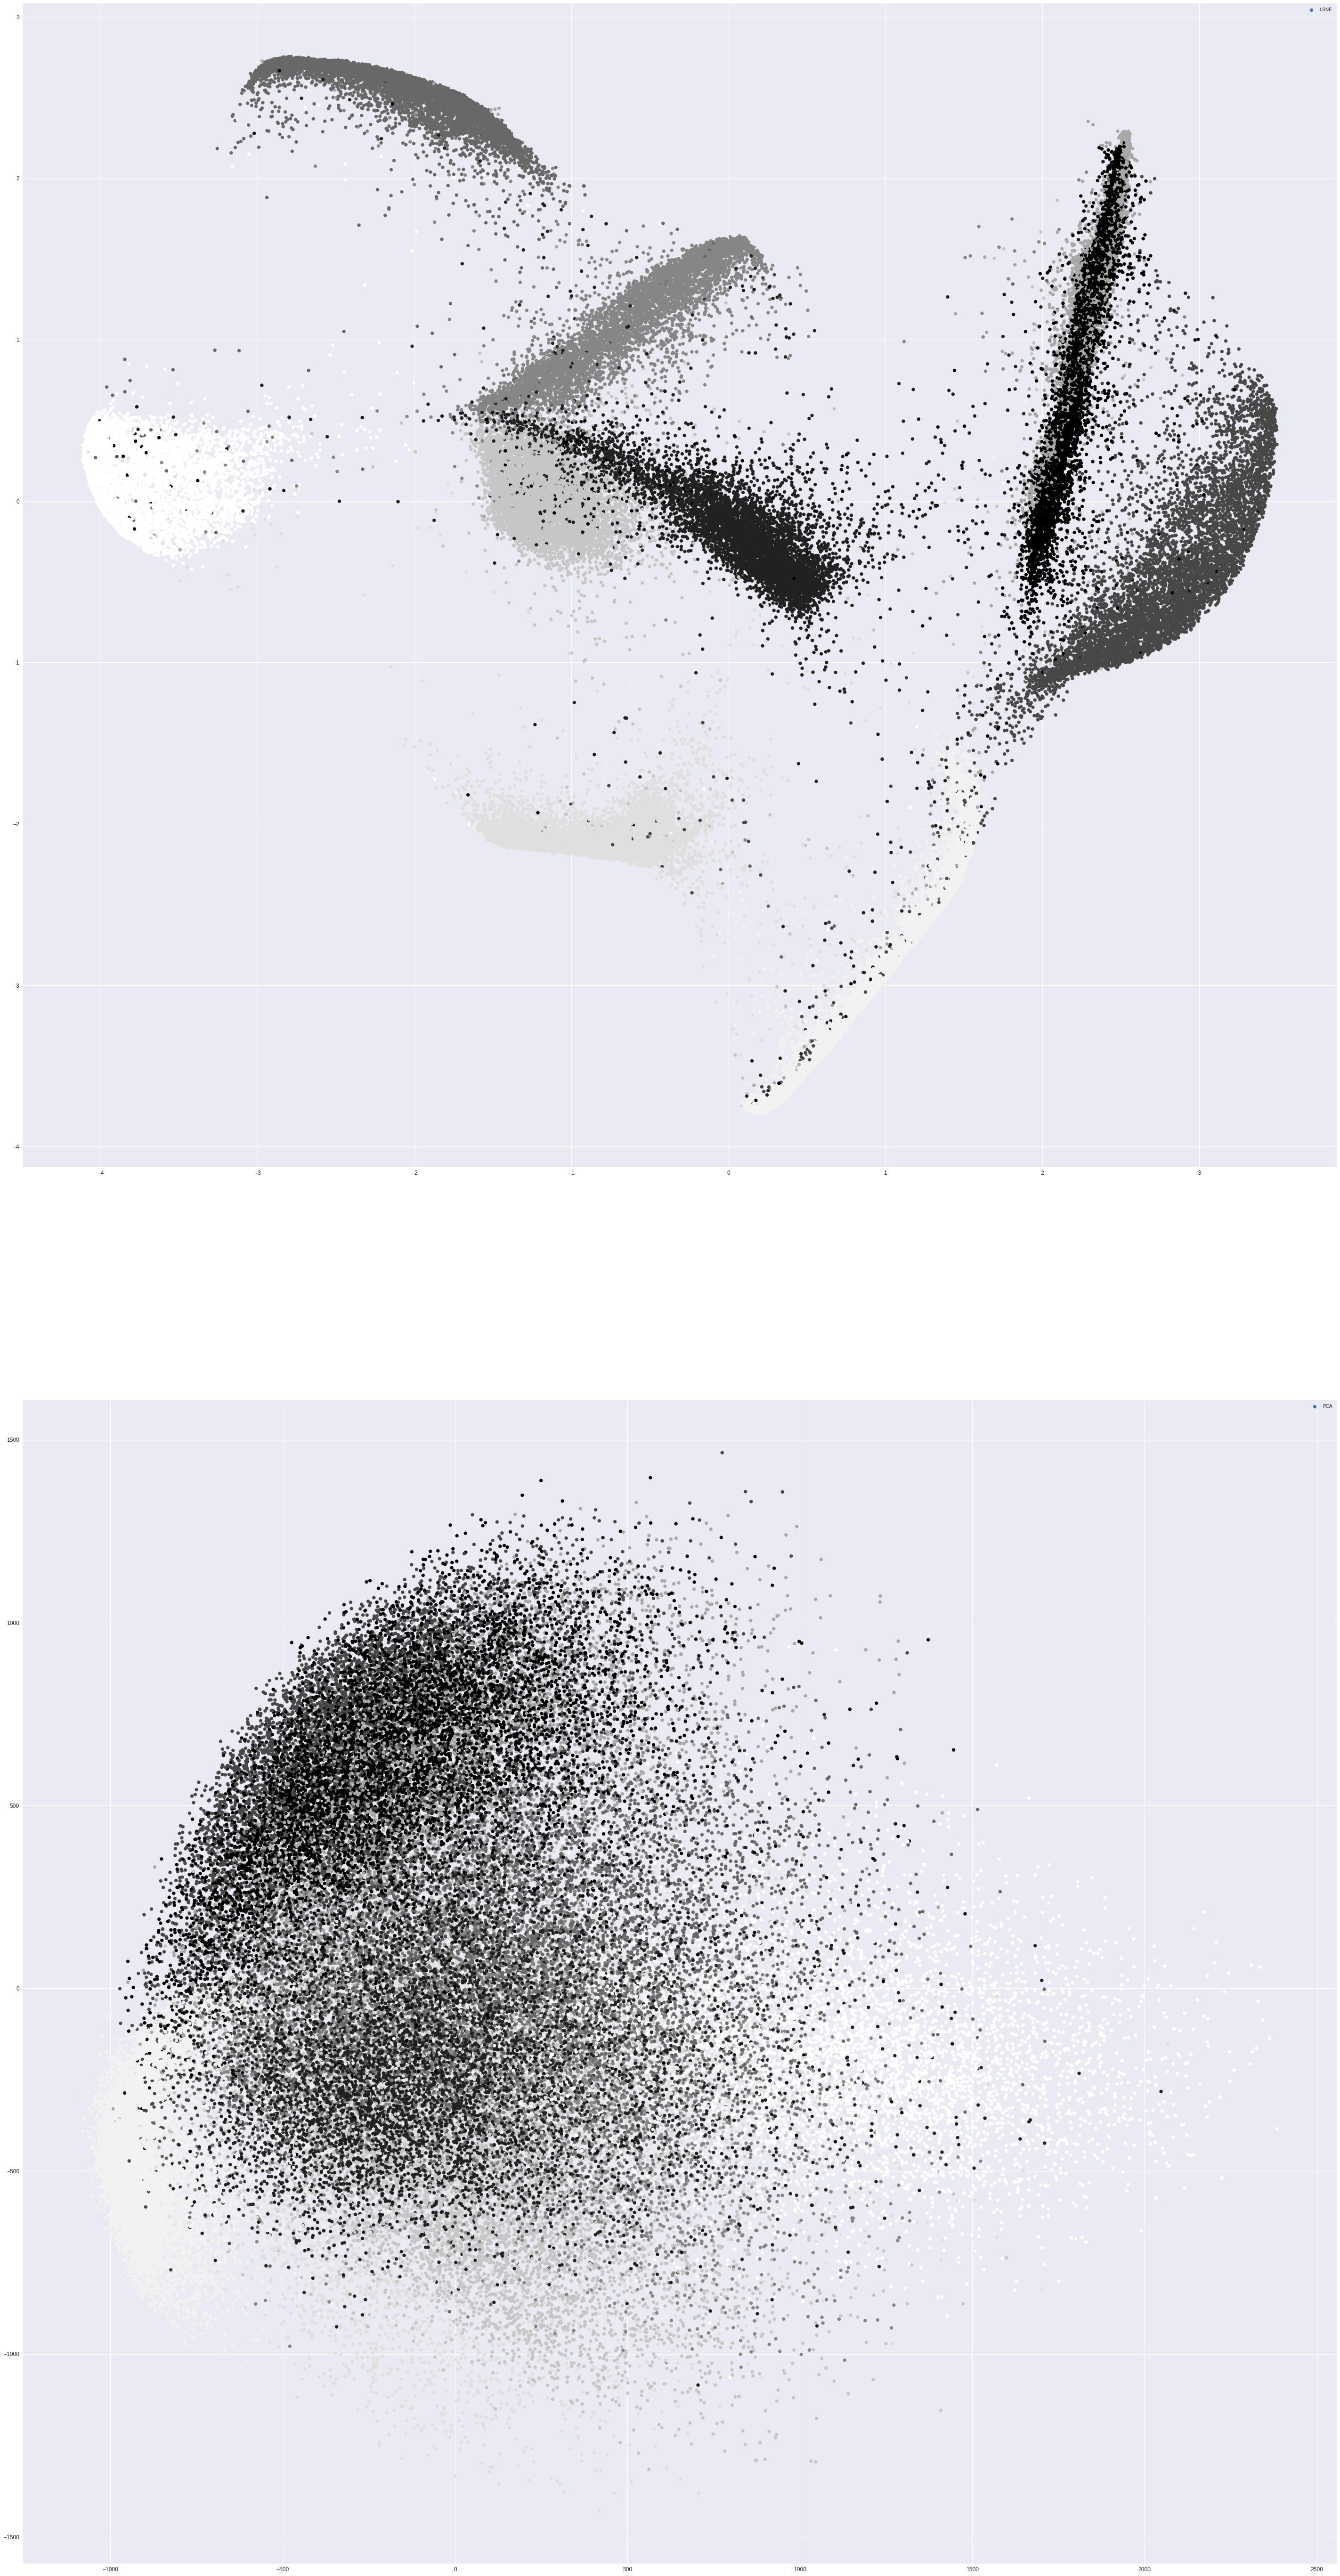

In [10]:
plt.figure(figsize=(50, 100))
plt.subplot(211)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y,label="t-SNE")
plt.legend()
plt.subplot(212)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y,label="PCA")
plt.legend()
plt.show()